In [41]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
os.chdir('C:\\Users\\v8204821\\Documents\\graduate-admissions')

In [4]:
dt = pd.read_csv('Admission_Predict_New.csv',index_col=0)

In [29]:
dt.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


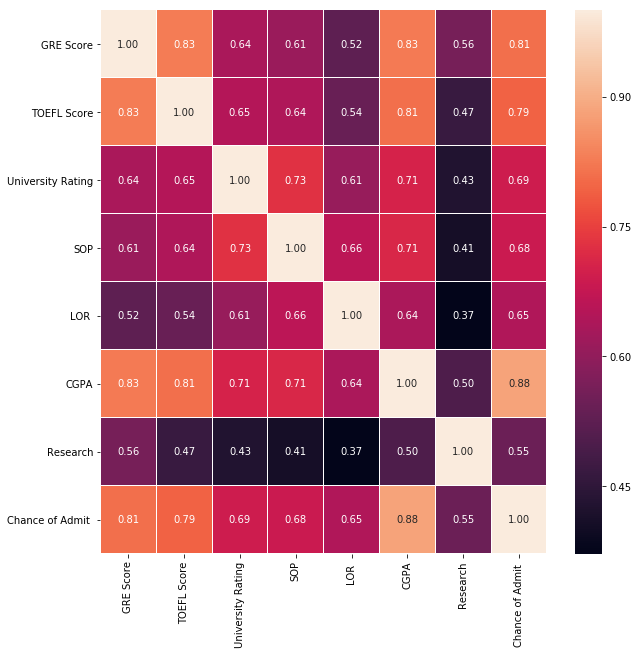

In [11]:
#Heat Map
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dt.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f')
plt.show()

Doesn't have Research: 220
Has Research: 280


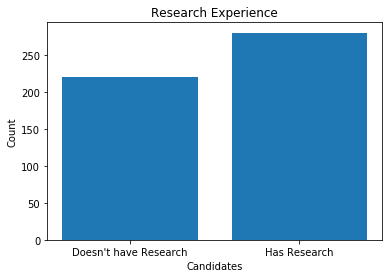

In [14]:
print("Doesn't have Research:",len(dt[dt.Research == 0]))
print("Has Research:",len(dt[dt.Research == 1]))
y = np.array([len(dt[dt.Research == 0]),len(dt[dt.Research == 1])])
x = ["Doesn't have Research","Has Research"]
plt.bar(x,y)
plt.title("Research Experience")
plt.xlabel("Candidates")
plt.ylabel("Count")
plt.show()

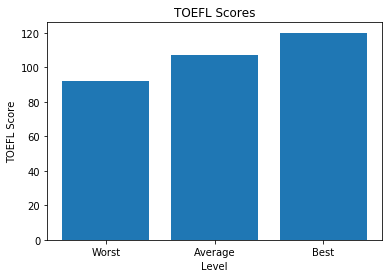

In [23]:
y = np.array([dt["TOEFL Score"].min(),dt["TOEFL Score"].mean(),dt["TOEFL Score"].max()])
x = ["Worst","Average","Best"]
barlist = plt.bar(x,y)
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()

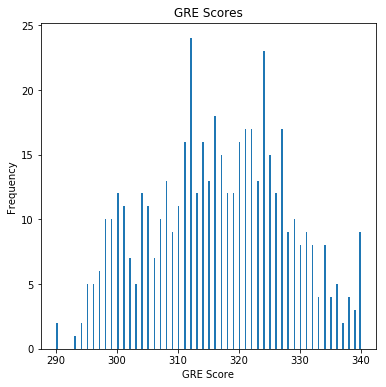

In [24]:
dt["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

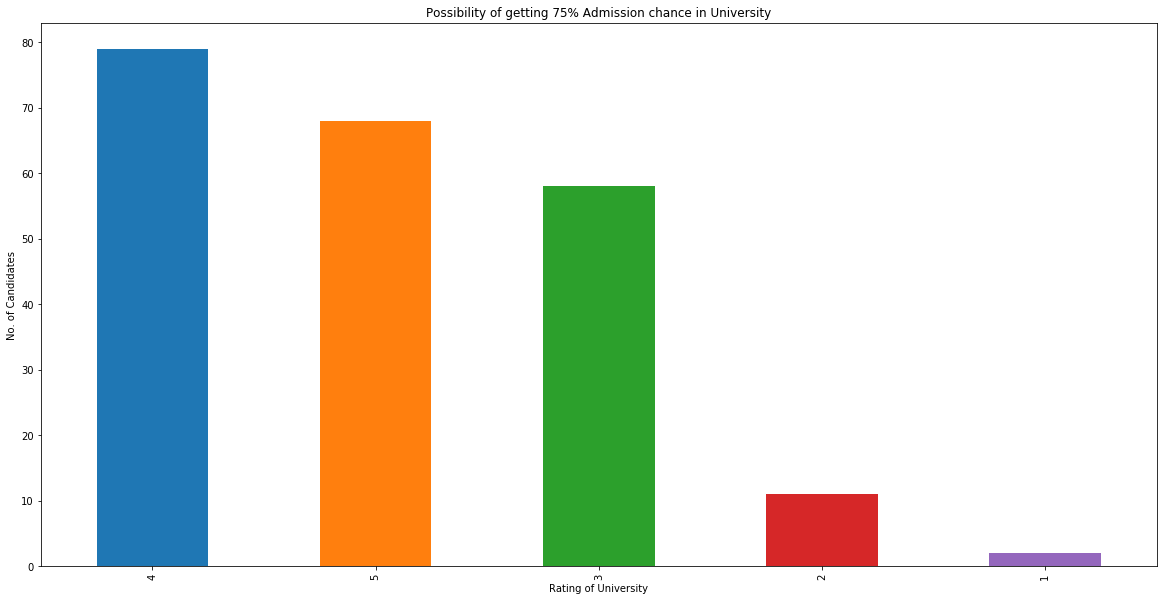

In [28]:
s = dt[dt["Chance of Admit "] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("Possibility of getting 75% Admission chance in University")
s.plot(kind='bar',figsize=(20, 10))
plt.xlabel("Rating of University")
plt.ylabel("No. of Candidates")
plt.show()

In [99]:
#Data Splitting
x = dt.iloc[:,0:7]
y = dt.iloc[:,-1].values

In [119]:
# Train(75) and Test Splits(25)
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [120]:
#Data Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scaler.transform(x_test[x_test.columns])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [102]:
#####################################Building Regression model##################################################################

In [150]:
#Support Vector Regression
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [151]:
y_pred = regressor.predict(x_test)

In [152]:
# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % regressor.score(x_test, y_test))

Variance score: 0.75


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


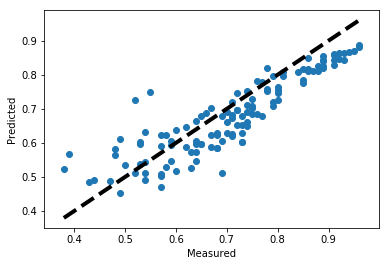

In [153]:
#############Plotting the actual versus predicted#############################################################################
fig,ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

In [154]:
#Linear Regression
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [155]:
y_pred1 = regressor1.predict(x_test)

In [156]:
# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % regressor1.score(x_test, y_test))

Variance score: 0.80


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


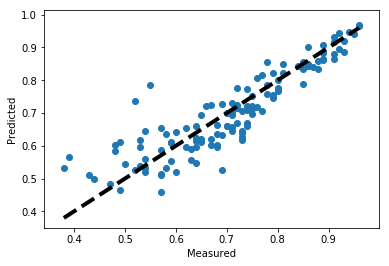

In [157]:
#############Plotting the actual versus predicted#############################################################################
fig,ax = plt.subplots()
ax.scatter(y_test, y_pred1)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

In [162]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
regressor2 = RandomForestRegressor()
regressor2.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [163]:
y_pred2 = regressor2.predict(x_test)

In [165]:
# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % regressor2.score(x_test, y_test))

Variance score: 0.79


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


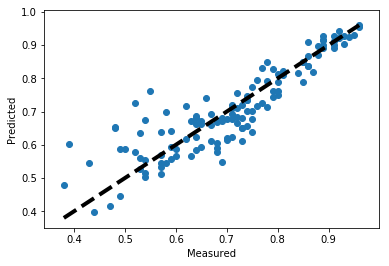

In [161]:
fig,ax = plt.subplots()
ax.scatter(y_test, y_pred2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

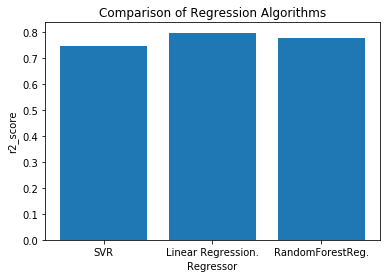

In [149]:
############################Comparison of the three Regression Algorithms Implemented#################################
y = np.array([regressor.score(x_test, y_test),regressor1.score(x_test, y_test),regressor2.score(x_test, y_test)])
x = ["SVR","Linear Regression.","RandomForestReg."]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()